<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/MNISTclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using magic lines to auto reload the python modules which will be imported

In [0]:
%matplotlib inline

#To reload all modules before executing a new line
%reload_ext autoreload
%autoreload 2

##Importing tensorflow 2.0 and Keras library

In [22]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)
from keras.datasets import mnist
from matplotlib import pyplot as plt

2.1.0


##Importing MNIST data from Keras Datasets

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##Shape of train data

In [24]:
x_train.shape

(60000, 28, 28)

## Shape of train classes

In [25]:
y_train.shape

(60000,)

## Shape of test data

In [26]:
x_test.shape

(10000, 28, 28)

##Shape of test classess

In [27]:
y_test.shape

(10000,)

## Visualizing one of the train data in gray scale.

In [0]:
import pandas as pd

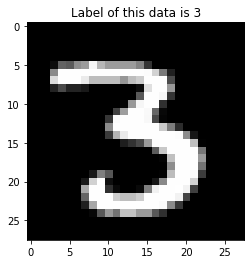

In [29]:
plt.subplot(111)
plt.axes(title="Label of this data is "+str(y_train[12]))
plt.imshow(x_train[12], 'gray')
plt.show()

## Reshaping the train data and test data for applying augmentation functions

In [0]:
x_train = x_train.reshape(600,100,28,28)

In [0]:
x_test = x_test.reshape(100,100,28,28)

##Using Keras ImageDataGenerator for applying the augmentation functions with specific magnitudes for each operation like shift, rotate etc..

In [32]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (600, 100, 28, 28) (28 channels).
  ' channels).')


## Reshaping the train labels also.

In [0]:
y_train = y_train.reshape(600,100)

## Now appending the data we got from Augmentation. Typically augmentation will increase dataset of magnitude 2048. Here we are limiting this magnitude within 10. Thus, the shape of train (60000, 784) went to (600000, 784) 

In [35]:
import numpy as np
i = 0
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=600):
  if (i == 10):
    break
  if (i == 0):
    x_prev = x_batch
    y_prev = y_batch
  else:
    x_prev = np.vstack((x_prev, x_batch))
    y_prev = np.vstack((y_prev, y_batch))
  i+=1
x_prev.shape
y_prev.shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (600, 100, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


(6000, 100)

## Changing test shape

In [0]:
x_test = x_test.reshape(10000,28,28)

##Assigning the concatenated data to the x_train and y_train respectively.

In [0]:
x_train = x_prev
y_train = y_prev

## Reshaping train data

In [0]:
x_train = x_train.reshape(600000,28,28)
y_train = y_train.reshape(600000,1)

##Applying random seed for consistent output

In [0]:
np.random.seed(10)

## Defining batch size to be 64

In [0]:
batch_size = 64

## Defining learning rate for Mini Batch Gradient Descent Algorithm

In [0]:
alpha = 0.0001

## Defining number of epochs

In [0]:
iterations = 3

##Defining number of pixels.

In [0]:
npixels = 784

## Defining number of labels(number of units in output layer) and number of units in hidden layers (600 and 300).

In [0]:
nlabels = 10
hidden_size1 = 600
hidden_size2 = 300

## Defining RELU and RELU Derivative function to use it in forward propagation and backward propagation respectively.

In [0]:
def relu(x):
  return (x>=0) * x
def relu_deriv(x):
  return x>=0

## Wait Initialization for weight matrix using the popular technique of 2/SQRT(num_input_units+num_output_units)

In [73]:
import math
w_0_1 = np.random.random((npixels, hidden_size1))*(2.0/np.sqrt(npixels+hidden_size1))*0.02
w_1_2 = np.random.random((hidden_size1, hidden_size2))*(2.0/np.sqrt(hidden_size1+hidden_size2))*0.02
w_2_3 = np.random.random((hidden_size2, nlabels))*(2.0/np.sqrt(hidden_size2+nlabels))*0.02

'\nw_0_1 = 0.20*np.random.random((npixels, hidden_size1)) - 0.1\nw_1_2 = 0.20*np.random.random((hidden_size1, hidden_size2)) - 0.1\nw_2_3 = 0.20*np.random.random((hidden_size2, nlabels)) - 0.1\n'

In [0]:
images, labels = (x_train.reshape(600000,28*28)/255.0, y_train)

In [75]:
labels.shape

(600000, 1)

## Applying one hot encoding on train labels. That is converting the discrete class label to array of label containg boolean values (1 in the index of class and 0 in rest of the indices.)

In [0]:
one_hot_labels = np.zeros((len(labels), 10))
for i,j in enumerate(labels):
  one_hot_labels[i][j] = 1
labels = one_hot_labels

## Weight vector of layer 0 to layer 1

In [77]:
w_0_1

array([[6.37923143e-06, 5.73982722e-04, 3.67399672e-05, ...,
        7.78015704e-04, 1.98472819e-04, 4.46262093e-04],
       [2.63663819e-04, 4.38861826e-04, 6.51997298e-04, ...,
        4.22294015e-04, 2.16986486e-04, 9.37399417e-04],
       [8.11928212e-05, 3.44262264e-05, 1.97390324e-04, ...,
        4.99110749e-04, 1.39774445e-04, 1.12176240e-04],
       ...,
       [3.95891421e-04, 9.33861311e-04, 9.84550722e-04, ...,
        8.18064591e-04, 6.78237782e-04, 4.12297012e-04],
       [1.83452166e-04, 3.09951220e-04, 1.04174042e-03, ...,
        9.67297036e-04, 3.30706720e-04, 9.51986142e-04],
       [2.45225606e-04, 6.77930154e-04, 4.20267291e-04, ...,
        9.22152657e-04, 4.32061543e-04, 9.59356063e-04]])

In [0]:
test_images, test_labels = (x_test.reshape(10000,28*28)/255.0, y_test)

## Applying one hot encoding on test labels.

In [0]:
one_hot_labels = np.zeros((len(test_labels), 10))
for i,j in enumerate(test_labels):
  one_hot_labels[i][j] = 1
test_labels = one_hot_labels

In [80]:
images.shape

(600000, 784)

## Softmax Function to be used in last layer which will help us to gain better accuracy for multiclass classification problem like MNIST Digit classifier dataset.

In [0]:
def softmax(x):
    """Compute the softmax of vector x."""
    exps = np.exp(x)
    return exps / np.sum(exps)

## Training the model in batch size of 64 and for 3 Epochs. The hidden layer 1 has 600 units and hidden layer 2 has 300 units. Then we have output layer. RELU is the activation function for both of the hidden layers. Softmax function is yet to be applied for the output layer. 50 percent Dropout is used in hidden layer 1 to reduce the overfitting of the model to the dataset.   

In [0]:
for j in range(iterations):
  err, crct = (0.0,0)
  for i in range(int((len(images))/batch_size)):
    start,end = ((i*batch_size), ((i+1)*batch_size))
    l0 = images[start:end]
    l1 = relu(np.dot(l0,w_0_1))
    dropout_mask = np.random.randint(2,size=l1.shape)
    l1 *= dropout_mask * 2
    l2 = relu(np.dot(l1,w_1_2))
    l3 = np.dot(l2,w_2_3)
    err += np.sum((labels[start:end] - l3)**2)
    for k in range(batch_size):
      crct += int(np.argmax(l3[k:k+1])==np.argmax(labels[start+k:start+(k+1)]))
      l3d = (labels[start:end]- l3)/batch_size
      l2d = l3d.dot(w_2_3.T)*relu_deriv(l2)
      l1d = l2d.dot(w_1_2.T)*relu_deriv(l1)
      l1d *= dropout_mask
      w_2_3 += alpha * l2.T.dot(l3d)
      w_1_2 += alpha * l1.T.dot(l2d)
      w_0_1 += alpha * l0.T.dot(l1d)
    print("train err "+str(err/float(len(images)))[0:7]+" train acc: "+str(crct/float(len(images)))[0:7])

    if ((j%2 == 1) or (j == iterations-1)):
      test_err = 0.0
      test_crct = 0

      for i in range(len(test_images)):
        l0 = test_images[i:i+1]
        l1 = relu(np.dot(l0,w_0_1))
        dropout_mask = np.random.randint(2,size=l1.shape)
        l1 *= dropout_mask * 2
        l2 = relu(np.dot(l1,w_1_2))
        l3 = np.dot(l2,w_2_3)
        l2 = np.dot(l1,w_1_2)
        test_err += np.sum((l3 - test_labels[i:i+1])**2)
        test_crct += int(np.argmax(l3)==np.argmax(test_labels[i:i+1]))
      print("test err " + str(test_err/float(len(test_images)))[0:7]+" test acc: "+str(test_crct/float(len(test_images)))[0:7])

Streaming output truncated to the last 5000 lines.
train err 0.41117 train acc: 0.05079
train err 0.41126 train acc: 0.05080
train err 0.41136 train acc: 0.05082
train err 0.41146 train acc: 0.05083
train err 0.41155 train acc: 0.05085
train err 0.41165 train acc: 0.05086
train err 0.41175 train acc: 0.05087
train err 0.41184 train acc: 0.05088
train err 0.41194 train acc: 0.0509
train err 0.41204 train acc: 0.05090
train err 0.41213 train acc: 0.05091
train err 0.41223 train acc: 0.05093
train err 0.41233 train acc: 0.05095
train err 0.41242 train acc: 0.05096
train err 0.41252 train acc: 0.05097
train err 0.41262 train acc: 0.05098
train err 0.41271 train acc: 0.05099
train err 0.41281 train acc: 0.05101
train err 0.41290 train acc: 0.05102
train err 0.41300 train acc: 0.05103
train err 0.41310 train acc: 0.05104
train err 0.41319 train acc: 0.05105
train err 0.41329 train acc: 0.05105
train err 0.41339 train acc: 0.05107
train err 0.41348 train acc: 0.05108
train err 0.41358 train a

In [122]:
print("test_Err " + str(test_err/float(len(test_images)))[0:5]+"test_Acc: "+str(test_crct/float(len(test_images))))

test_Err 0.407test_Acc: 0.8676
